#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df = pd.read_csv('datasets/led7digit.csv')

In [3]:
df.head(5)

,Led1,Led2,Led3,Led4,Led5,Led6,Led7,Number
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Led1    500 non-null    float64
 1   Led2    500 non-null    float64
 2   Led3    500 non-null    float64
 3   Led4    500 non-null    float64
 4   Led5    500 non-null    float64
 5   Led6    500 non-null    float64
 6   Led7    500 non-null    float64
 7   Number  500 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 31.4 KB
Number of duplicated rows is:  354
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

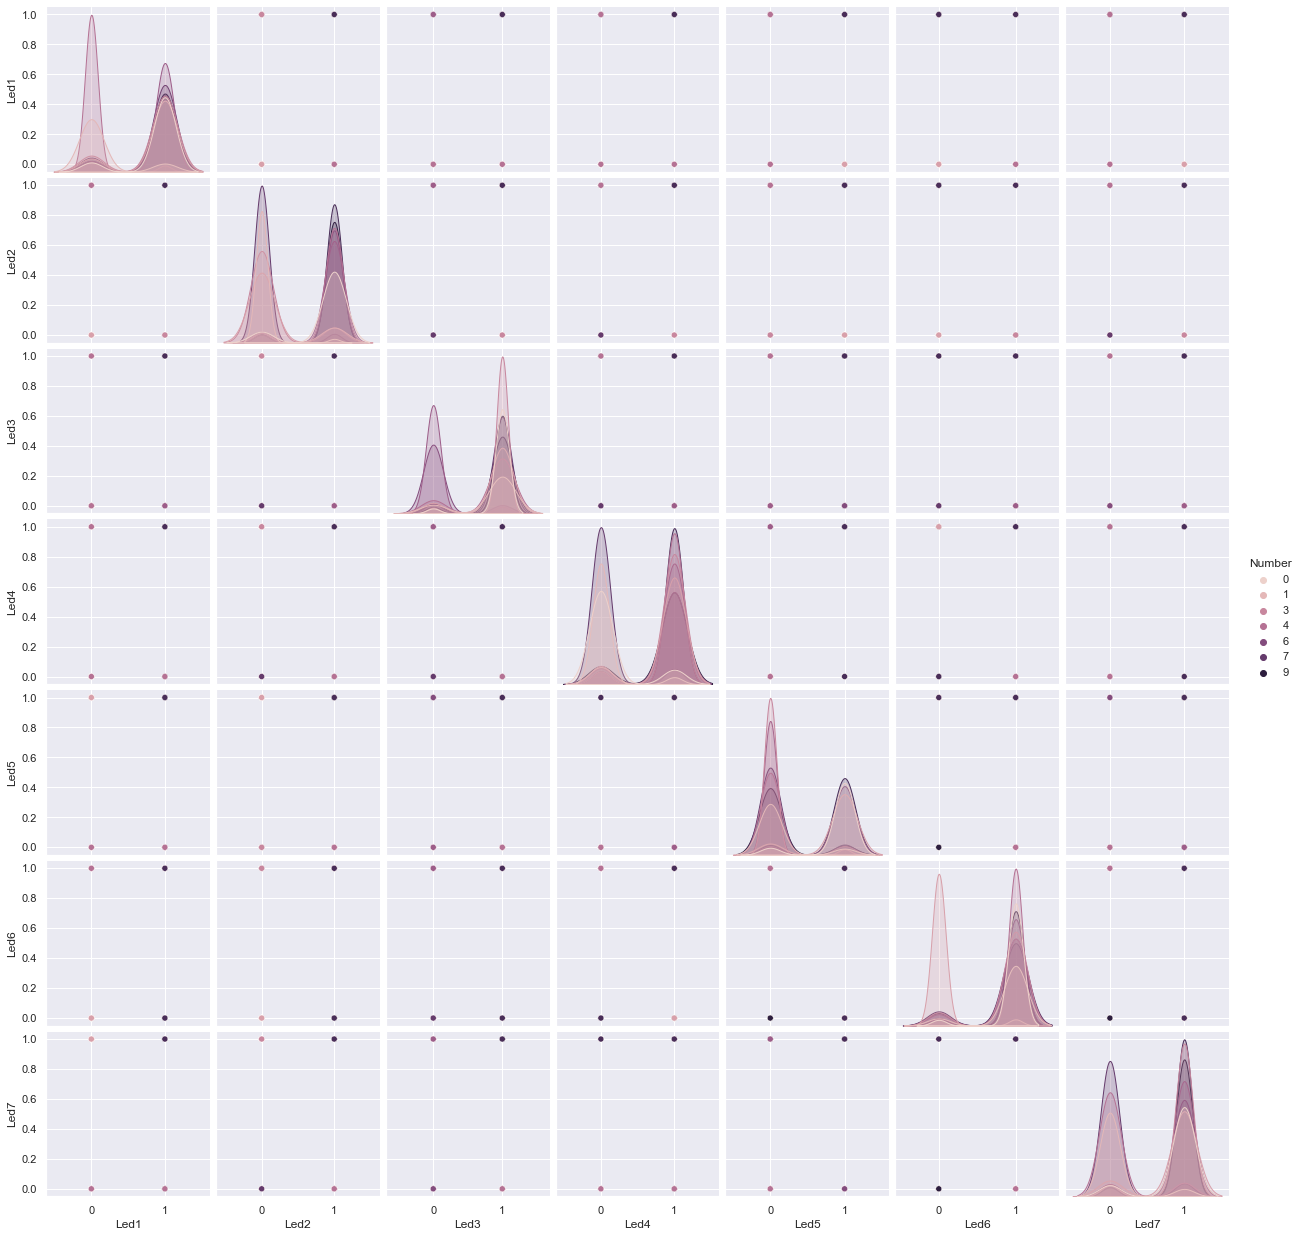

In [5]:
sns.pairplot(df, hue='Number')
plt.show()

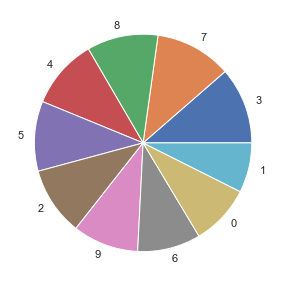

In [6]:
y =df['Number']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['Number'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Led1,500.0,0.726,0.446456,0.0,0.0,1.0,1.0,1.0
Led2,500.0,0.590,0.492326,0.0,0.0,1.0,1.0,1.0
Led3,500.0,0.734,0.442307,0.0,0.0,1.0,1.0,1.0
Led4,500.0,0.662,0.473502,0.0,0.0,1.0,1.0,1.0
Led5,500.0,0.396,0.489554,0.0,0.0,0.0,1.0,1.0
Led6,500.0,0.818,0.386231,0.0,1.0,1.0,1.0,1.0
Led7,500.0,0.670,0.470684,0.0,0.0,1.0,1.0,1.0


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Led1,500.0,1.776357e-17,1.001002,-1.627770,-1.627770,0.614337,0.614337,0.614337
Led2,500.0,9.237056e-17,1.001002,-1.199593,-1.199593,0.833616,0.833616,0.833616
Led3,500.0,8.704149e-17,1.001002,-1.661144,-1.661144,0.601995,0.601995,0.601995
Led4,500.0,-1.074696e-16,1.001002,-1.399493,-1.399493,0.714545,0.714545,0.714545
Led5,500.0,-1.243450e-17,1.001002,-0.809709,-0.809709,-0.809709,1.235011,1.235011
Led6,500.0,1.563194e-16,1.001002,-2.120025,0.471693,0.471693,0.471693,0.471693
Led7,500.0,-4.796163e-17,1.001002,-1.424887,-1.424887,0.701810,0.701810,0.701810


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

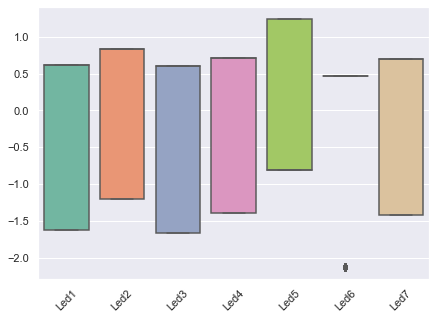

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

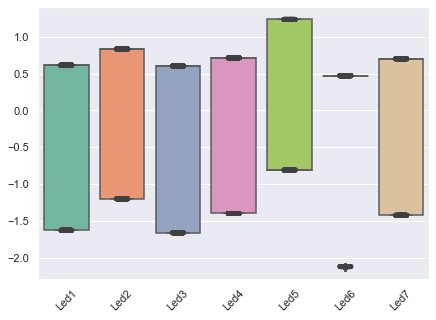

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

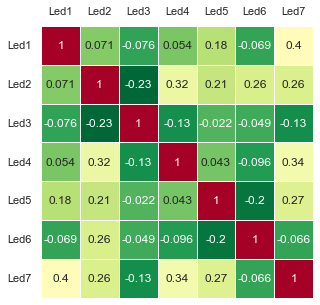

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.180495,-0.279920,-0.570042,2.171368,0.391290,-1.292067,-0.965685
1,0.067905,-0.316264,-1.494276,-0.172642,-0.587024,0.000343,-1.432504
2,-0.644577,0.391399,-1.795727,1.197082,0.107496,-0.182422,-0.602030
3,-0.644577,0.391399,-1.795727,1.197082,0.107496,-0.182422,-0.602030
4,2.956559,-0.362873,-0.020252,0.345231,0.235976,-0.518233,-0.036030
...,...,...,...,...,...,...,...
495,-0.806507,-0.588084,-0.144171,-0.369111,-1.382086,0.294120,-0.407389
496,1.192395,-1.571583,1.279826,0.920761,-0.572965,0.645043,-0.064391
497,-1.421509,-1.314031,0.086514,-1.332143,0.386381,0.061254,-0.174531
498,1.241735,-0.628444,-1.295964,0.142944,-0.061697,1.460911,-0.725852


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (28.2% expl.var)', ylabel='PC2 (19.1% expl.var)'>)

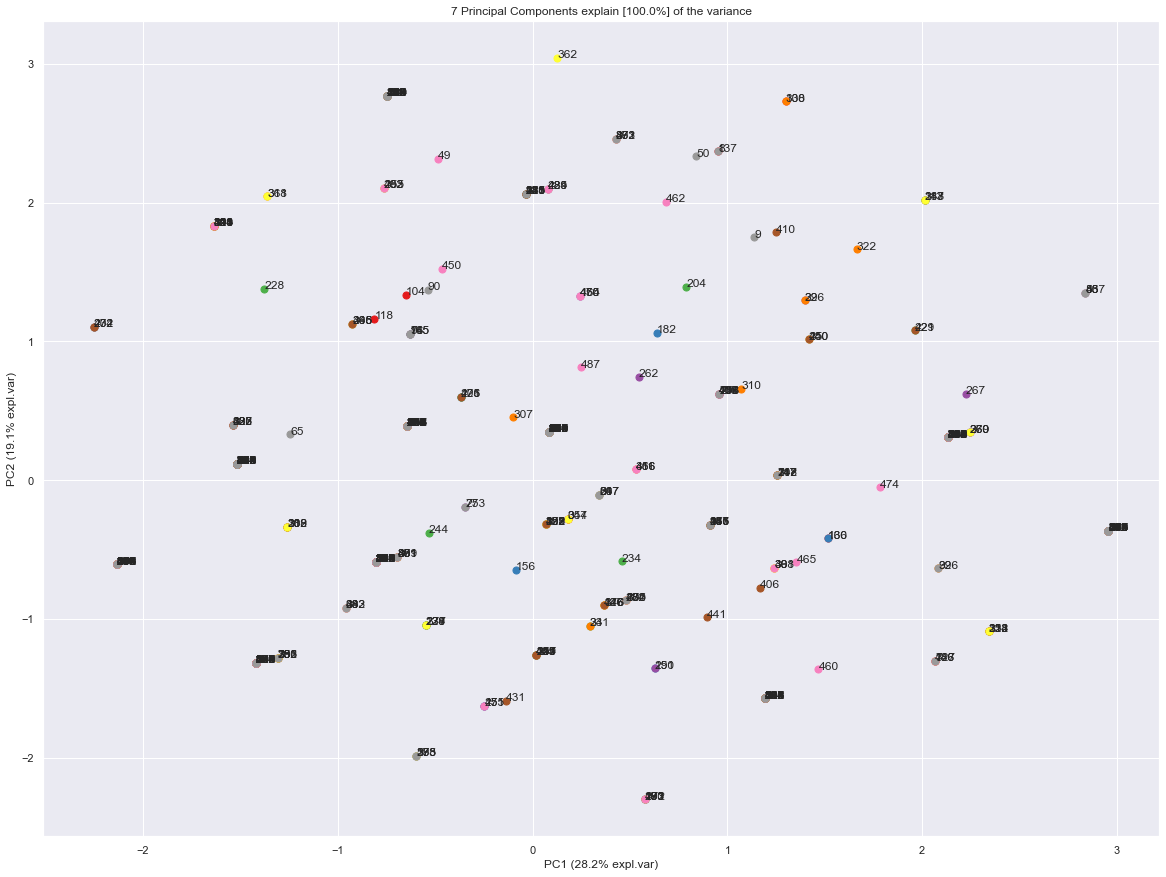

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

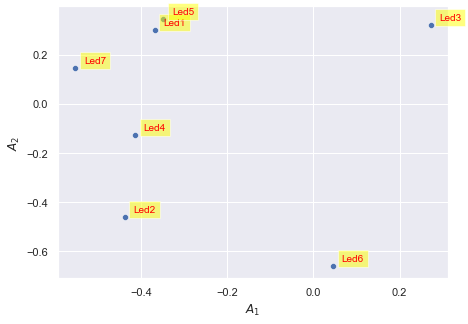

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

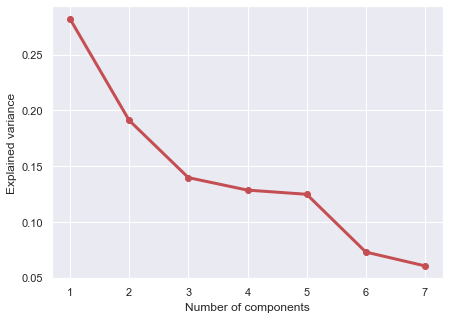

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

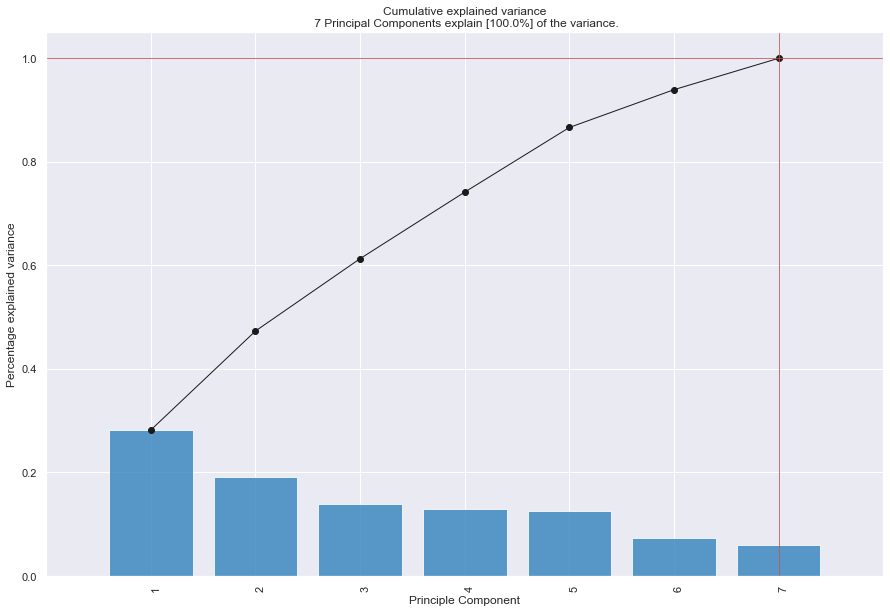

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();